In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [97]:
df = pd.read_csv('cleaned_flight_data_with_target.csv')
df.head(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,CRS_ARR_M,Temperature,Dew Point,Humidity,...,Condition_Light Snow / Windy,Condition_Mostly Cloudy,Condition_Mostly Cloudy / Windy,Condition_Partly Cloudy,Condition_Partly Cloudy / Windy,Condition_Rain,Condition_Rain / Windy,Condition_Snow,Condition_Wintry Mix,Condition_Wintry Mix / Windy
0,11,1,5,124,636,324,448,48,34,58,...,False,False,False,False,False,False,False,False,False,False
1,11,1,5,371,2475,340,531,48,34,58,...,False,False,False,False,False,False,False,False,False,False
2,11,1,5,181,1069,301,482,48,34,58,...,False,False,False,False,False,False,False,False,False,False
3,11,1,5,168,944,345,513,48,34,58,...,False,False,False,False,False,False,False,False,False,False
4,11,1,5,139,760,360,499,46,32,58,...,False,False,False,False,False,False,False,False,False,False


(array([5.000e+00, 3.113e+03, 5.720e+02, 1.099e+03, 3.532e+03, 5.783e+03,
        4.769e+03, 3.822e+03, 3.003e+03, 3.122e+03]),
 array([ 0. ,  9.7, 19.4, 29.1, 38.8, 48.5, 58.2, 67.9, 77.6, 87.3, 97. ]),
 <BarContainer object of 10 artists>)

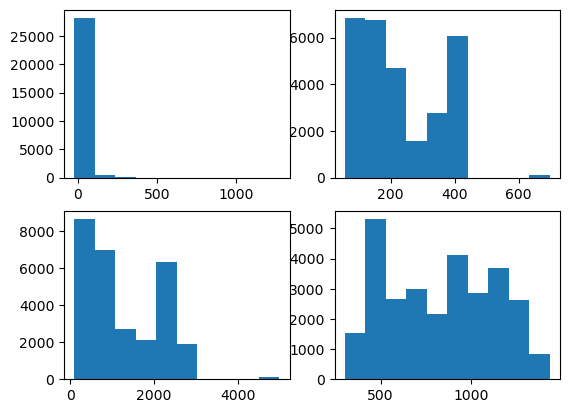

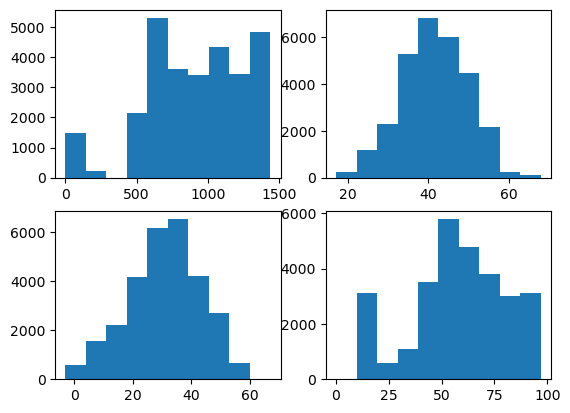

In [98]:
fig, axs = plt.subplots(2,2)
axs[0,0].hist('DEP_DELAY', data=df)
axs[0,1].hist('CRS_ELAPSED_TIME', data=df)
axs[1,0].hist('DISTANCE', data=df)
axs[1,1].hist('CRS_DEP_M', data=df)

fig, axs = plt.subplots(2,2)
axs[0,0].hist('CRS_ARR_M', data=df)
axs[0,1].hist('Temperature', data=df)
axs[1,0].hist('Dew Point', data=df)
axs[1,1].hist('Humidity', data=df)

10.686000360165439


/Users/engineererjojo/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/engineererjojo/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/engineererjojo/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

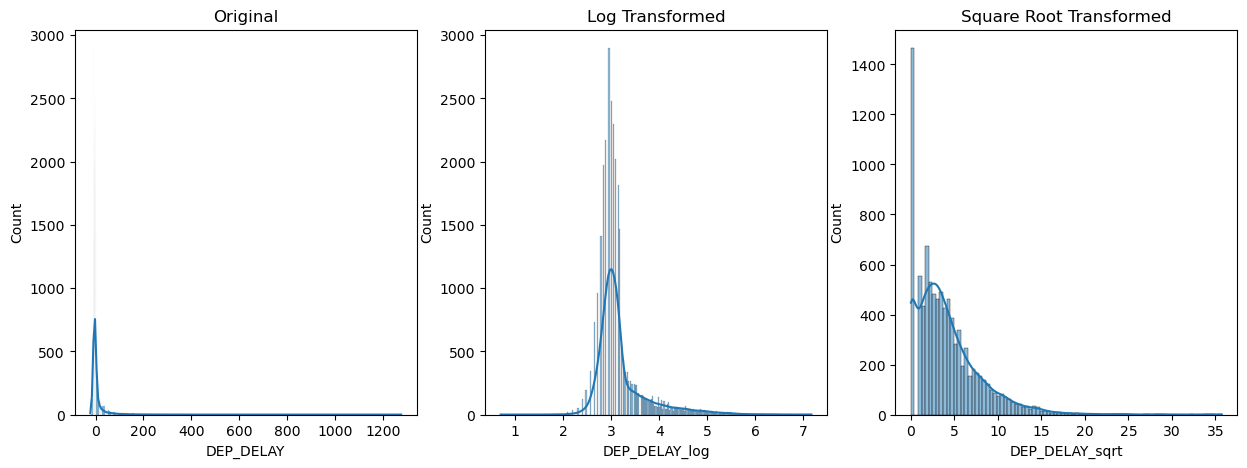

In [99]:
# deal with values which are skew
print(df['DEP_DELAY'].skew())  # If > 0.5 or < -0.5, transformation is needed

df['DEP_DELAY_log'] = np.log1p(df['DEP_DELAY'])  # log1p avoids log(0) issue
df['DEP_DELAY_sqrt'] = np.sqrt(df['DEP_DELAY']) # sqrt version 

df['DEP_DELAY_shifted'] = df['DEP_DELAY'] - df['DEP_DELAY'].min() + 1
df['DEP_DELAY_log'] = np.log1p(df['DEP_DELAY_shifted'])

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['DEP_DELAY'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(df['DEP_DELAY_log'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed')

sns.histplot(df['DEP_DELAY_sqrt'], kde=True, ax=axes[2])
axes[2].set_title('Square Root Transformed')

plt.show()


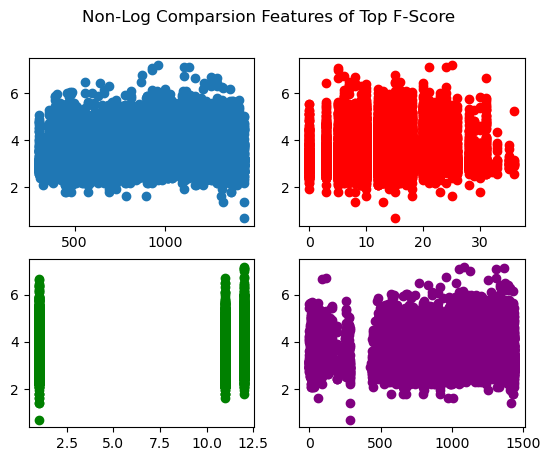

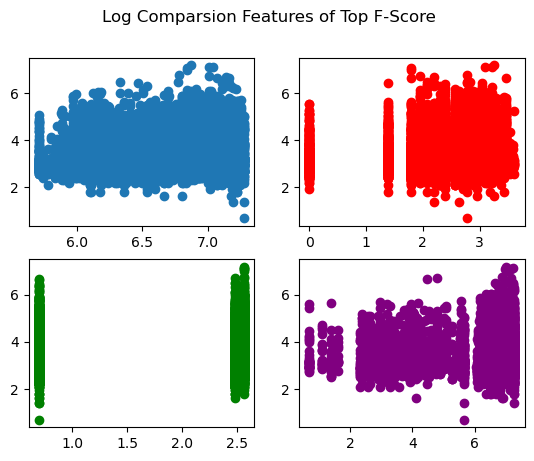

In [100]:
fig, axs = plt.subplots(2,2)
fig.suptitle('Non-Log Comparsion Features of Top F-Score')
axs[0,0].scatter('CRS_DEP_M','DEP_DELAY_log',data=df)
axs[0,1].scatter('Wind Speed','DEP_DELAY_log', data=df, color='red')
axs[1,0].scatter('MONTH', 'DEP_DELAY_log',data=df, color='green')
axs[1,1].scatter('CRS_ARR_M','DEP_DELAY_log', data=df, color='purple')


df['CRS_DEP_M_log'] = np.log1p(df['CRS_DEP_M'])  # log1p avoids log(0) issue
df['Wind_Speed_log'] = np.log1p(df['Wind Speed'])  # log1p avoids log(0) issue
df['MONTH_log'] = np.log1p(df['MONTH'])  # log1p avoids log(0) issue
df['CRS_ARR_M_log'] = np.log1p(df['CRS_ARR_M'])  # log1p avoids log(0) issue

fig, axs = plt.subplots(2,2)
fig.suptitle('Log Comparsion Features of Top F-Score')
axs[0,0].scatter('CRS_DEP_M_log','DEP_DELAY_log',data=df)
axs[0,1].scatter('Wind_Speed_log','DEP_DELAY_log', data=df, color='red')
axs[1,0].scatter('MONTH_log', 'DEP_DELAY_log',data=df, color='green')
axs[1,1].scatter('CRS_ARR_M_log','DEP_DELAY_log', data=df, color='purple')

ValueError: x and y must be the same size

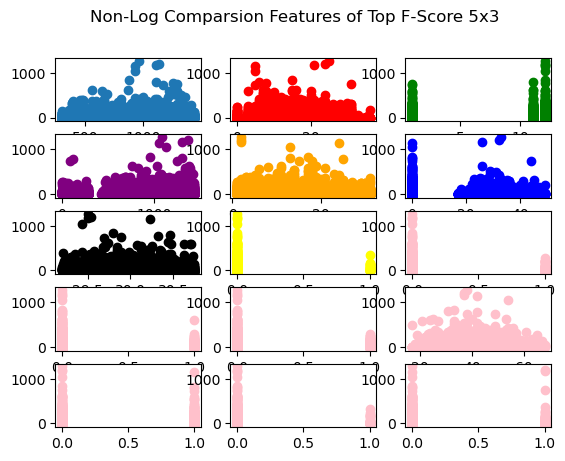

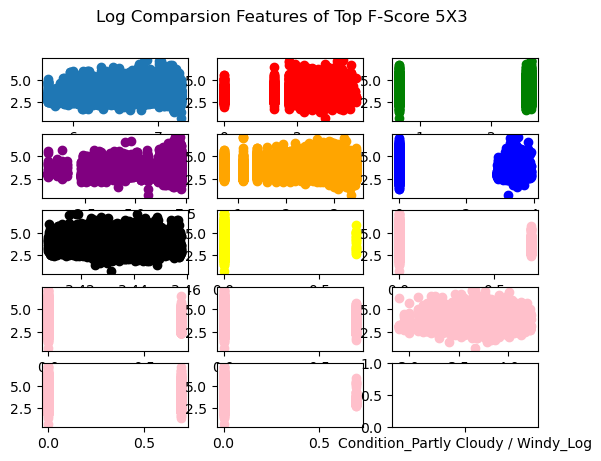

In [101]:
fig, axs = plt.subplots(5,3)
fig.suptitle('Non-Log Comparsion Features of Top F-Score 5x3')
axs[0,0].scatter('CRS_DEP_M','DEP_DELAY',data=df)
axs[0,1].scatter('Wind Speed','DEP_DELAY', data=df, color='red')
axs[0,2].scatter('MONTH', 'DEP_DELAY',data=df, color='green')

axs[1,0].scatter('CRS_ARR_M','DEP_DELAY', data=df, color='purple')
axs[1,1].scatter('DAY_OF_MONTH','DEP_DELAY', data=df, color='orange')
axs[1,2].scatter('Wind Gust','DEP_DELAY', data=df, color='blue')

axs[2,0].scatter('Pressure','DEP_DELAY', data=df, color='black')
axs[2,1].scatter('Condition_Light Snow / Windy','DEP_DELAY', data=df, color='yellow')
axs[2,2].scatter('Condition_Rain','DEP_DELAY', data=df, color='pink')

axs[3,0].scatter('OP_UNIQUE_CARRIER_MQ','DEP_DELAY', data=df, color='pink')
axs[3,1].scatter('DEST_LAX','DEP_DELAY', data=df, color='pink')
axs[3,2].scatter('Temperature','DEP_DELAY', data=df, color='pink')

axs[4,0].scatter('Condition_Mostly Cloudy','DEP_DELAY', data=df, color='pink')
axs[4,1].scatter('Condition_Heavy Rain','DEP_DELAY', data=df, color='pink')
axs[4,2].scatter('Condition_Partly Cloudy / Windy','DEP_DELAY', data=df, color='pink')

# fig, axs = plt.subplots(3,3)
# fig.suptitle('Non-Log Comparsion Features of Top F-Score 3x3')
# axs[0,0].scatter('CRS_DEP_M','DEP_DELAY_log',data=df)
# axs[0,1].scatter('Wind Speed','DEP_DELAY_log', data=df, color='red')
# axs[0,2].scatter('MONTH', 'DEP_DELAY_log',data=df, color='green')
# axs[1,0].scatter('CRS_ARR_M','DEP_DELAY_log', data=df, color='purple')
# axs[1,1].scatter('DAY_OF_MONTH','DEP_DELAY_log', data=df, color='orange')
# axs[1,2].scatter('Wind Gust','DEP_DELAY_log', data=df, color='blue')
# axs[2,0].scatter('Pressure','DEP_DELAY_log', data=df, color='black')
# axs[2,1].scatter('Condition_Light Snow / Windy','DEP_DELAY_log', data=df, color='yellow')
# axs[2,2].scatter('Condition_Rain','DEP_DELAY_log', data=df, color='pink')


# LOG-X Features
df['CRS_DEP_M_log'] = np.log1p(df['CRS_DEP_M'])  # log1p avoids log(0) issue
df['Wind_Speed_log'] = np.log1p(df['Wind Speed'])  # log1p avoids log(0) issue
df['MONTH_log'] = np.log1p(df['MONTH'])  # log1p avoids log(0) issue

df['CRS_ARR_M_log'] = np.log1p(df['CRS_ARR_M'])  # log1p avoids log(0) issue
df['DAY_OF_MONTH_log'] = np.log1p(df['DAY_OF_MONTH'])  # log1p avoids log(0) issue
df['Wind_Gust_log'] = np.log1p(df['Wind Gust'])  # log1p avoids log(0) issue

df['Pressure_log'] = np.log1p(df['Pressure'])  # log1p avoids log(0) issue
df['Condition_Light Snow / Windy_log'] = np.log1p(df['Condition_Light Snow / Windy'])  # log1p avoids log(0) issue
df['Condition_Rain_log'] = np.log1p(df['Condition_Rain'])  # log1p avoids log(0) issue

df['OP_UNIQUE_CARRIER_MQ_log'] = np.log1p(df['OP_UNIQUE_CARRIER_MQ'])  # log1p avoids log(0) issue
df['DEST_LAX_log'] = np.log1p(df['DEST_LAX'])  # log1p avoids log(0) issue
df['Temperature_log'] = np.log1p(df['Temperature'])  # log1p avoids log(0) issue

df['Condition_Mostly_Cloudy_log'] = np.log1p(df['Condition_Mostly Cloudy'])  # log1p avoids log(0) issue
df['Condition_Heavy_Rain_log'] = np.log1p(df['Condition_Heavy Rain'])  # log1p avoids log(0) issue
df['Condition_Partly Cloudy / Windy_log'] = np.log1p(df['Condition_Partly Cloudy / Windy'])  # log1p avoids log(0) issue


fig, axs = plt.subplots(5,3)
fig.suptitle('Log Comparsion Features of Top F-Score 5X3')

axs[0,0].scatter('CRS_DEP_M_log','DEP_DELAY_log',data=df)
axs[0,1].scatter('Wind_Speed_log','DEP_DELAY_log', data=df, color='red')
axs[0,2].scatter('MONTH_log', 'DEP_DELAY_log',data=df, color='green')

axs[1,0].scatter('CRS_ARR_M_log','DEP_DELAY_log', data=df, color='purple')
axs[1,1].scatter('DAY_OF_MONTH_log','DEP_DELAY_log', data=df, color='orange')
axs[1,2].scatter('Wind_Gust_log','DEP_DELAY_log', data=df, color='blue')

axs[2,0].scatter('Pressure_log','DEP_DELAY_log', data=df, color='black')
axs[2,1].scatter('Condition_Light Snow / Windy_log','DEP_DELAY_log', data=df, color='yellow')
axs[2,2].scatter('Condition_Rain_log','DEP_DELAY_log', data=df, color='pink')

axs[3,0].scatter('OP_UNIQUE_CARRIER_MQ_log','DEP_DELAY_log', data=df, color='pink')
axs[3,1].scatter('DEST_LAX_log','DEP_DELAY_log', data=df, color='pink')
axs[3,2].scatter('Temperature_log','DEP_DELAY_log', data=df, color='pink')

axs[4,0].scatter('Condition_Mostly_Cloudy_log','DEP_DELAY_log', data=df, color='pink')
axs[4,1].scatter('Condition_Heavy_Rain_log','DEP_DELAY_log', data=df, color='pink')
axs[4,2].scatter('Condition_Partly Cloudy / Windy_Log','DEP_DELAY_log', data=df, color='pink')